# INFO

**For content generation, you need to connect the GPU!**

*`How to do this: Edit => Notebook settings => Hardware accelerator => GPU`*

*`The resulting content will be in an archive, which you will need to download.`*


**model** = *Trained model with which to create your content*

**number_of_repetitions** = *Speaks for itself *

**prompt** = *Your request, what do you want to see. Can be in the form of a single word or sentence.*

**negative_prompt** = *Same thing only in the negative (what you don't want to see)*

**help_with_prompt** = *Words added by the author (helps to make the image better)*

**num_frames** = *Video length*

**num_inference_steps** = *Processing time*

# Program

In [ ]:
#@title ## Install
from IPython.display import clear_output
print("1/5")
!pip install diffusers
clear_output()
print("2/5")
!pip install transformers
clear_output()
print("3/5")
!pip install accelerate
clear_output()
print("4/5")
!pip install scipy
clear_output()
print("5/5")
!pip install safetensors
clear_output()
import random
import time
import os
import torch
from diffusers import DiffusionPipeline
from diffusers import StableDiffusionPipeline
from diffusers import EulerDiscreteScheduler
from diffusers import DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
from zipfile import ZipFile
from google.colab.patches import cv2_imshow

In [ ]:
#@title ## Code
def zip_packing_img(model, number_of_repetitions, img):
  with ZipFile(f"{model} [{number_of_repetitions}].zip", "a") as myzip:
        myzip.write(img)
        os.remove(img)
  myzip.close()

def image_generation(model,Random, number_of_repetitions, prompt, negative_prompt, image_name):
  if model == "[2.0] dreamlike-photoreal":
    model_id = "dreamlike-art/dreamlike-photoreal-2.0"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    height = 1024
    width = 768
    if help_with_prompt == True:
      prompt = f"photo realism, photo,high quality, bright cinematic lighting, gopro, one person, {prompt}"
    image = pipe(prompt, height=height, width=width).images[0]
    image.save(f"{image_name}.jpg")
    img = f"{image_name}.jpg"

  elif model == "[1.0] dreamlike-anime":
    model_id = "dreamlike-art/dreamlike-anime-1.0"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    height = 832
    width = 704
    if help_with_prompt == True:
      prompt = f"photo anime, masterpiece, high quality, absurdres, {prompt}"
      negative_prompt = f'simple background, duplicate, retro style, low quality, lowest quality, 1980s, 1990s, 2000s, 2005 2006 2007 2008 2009 2010 2011 2012 2013, bad anatomy, bad proportions, extra digits, lowres, username, artist name, error, duplicate, watermark, signature, text, extra digit, fewer digits, worst quality, jpeg artifacts, blurry, {negative_prompt}'
    image = pipe(prompt, height=height, width=width, negative_prompt=negative_prompt).images[0]
    image.save(f"{image_name}.jpg")
    img = f"{image_name}.jpg"

  elif model == "[1.0] dreamlike-diffusion":
    model_id = "dreamlike-art/dreamlike-diffusion-1.0"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    height = 768
    width = 512
    if help_with_prompt == True:
      prompt = f"dreamlikeart, dynamic pose,high quality, crisp lines and color, complex background, particles, lines, concept art, sharp focus, vivid colors, {prompt}"
    image = pipe(prompt, height=height, width=width).images[0]
    image.save(f"{image_name}.jpg")
    img = f"{image_name}.jpg"

  elif model == "[1.3-1.5] Cyberpunk-Anime-Diffusion":
    model_id = "DGSpitzer/Cyberpunk-Anime-Diffusion"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    # height = 512
    # width = 512
    if help_with_prompt == True:
      prompt = f"portrait of in dgs illustration style, Anime, cyberpunk city, , ((perfect femine face)), intricate, 8k, highly detailed, shy, digital painting, intense, sharp focus, full-length, {prompt}"
    image = pipe(prompt).images[0]
    image.save(f"{image_name}.jpg")
    img = f"{image_name}.jpg"



  elif model == "[2.0] stable-diffusion":
    model_id = "stabilityai/stable-diffusion-2"
    scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
    pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    height = 768
    width = 768
    if help_with_prompt == True:
      prompt = f"high quality, {prompt}"
    image = pipe(prompt, height=height, width=width).images[0]
    image.save(f"{image_name}.jpg")
    img = f"{image_name}.jpg"
  zip_packing_img(model, number_of_repetitions, img)

def IMG(model, number_of_repetitions, prompt, negative_prompt):
  image_name = 0
  Random = False
  for _ in range(number_of_repetitions):
    image_name = image_name + 1
    if model == "Random":
      Random = True
      models = ["[2.0] dreamlike-photoreal", "[2.0] stable-diffusion", "[1.0] dreamlike-anime", "[1.0] dreamlike-diffusion"]
      model = random.choice(models)
    clear_output()
    print(f"{image_name}/{number_of_repetitions}\nmodel: {model}\nprompt: {prompt}\nnegative_prompt: {negative_prompt}\nhelp_with_prompt: {help_with_prompt}")
    image_generation(model, Random, number_of_repetitions, prompt, negative_prompt, image_name)
  clear_output()
  print(f"The generation is over! You can download your file: {model} [{number_of_repetitions}].zip")
#-------------------------VID#-------------------------
def zip_packing_vid(model, number_of_repetitions, video_path):
  with ZipFile(f"{model} [{number_of_repetitions}].zip", "a") as myzip:
        myzip.write(video_path)
        os.remove(video_path)
  myzip.close()

def video_generation(model, Random, number_of_repetitions, prompt, negative_prompt, video_name, help_with_prompt):
  if model == "[1.7b] text-to-video-ms":
    if help_with_prompt == True:
      prompt = f"high quality, {prompt}"
      negative_prompt = f"text, watermark, copyright, blurry, low resolution, blur, low quality, {negative_prompt}"
    pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe.enable_model_cpu_offload()
    video_frames = pipe(prompt, negative_prompt=negative_prompt, num_frames=num_frames, num_inference_steps=num_inference_steps).frames
    video_path = export_to_video(video_frames)

  if model == "[2_576w] zeroscope":
    if help_with_prompt == True:
      prompt = f"high quality, {prompt}"
      negative_prompt = f"text, watermark, copyright, blurry, low resolution, blur, low quality, {negative_prompt}"
    height = 320
    width = 576
    pipe = DiffusionPipeline.from_pretrained("cerspense/zeroscope_v2_576w", torch_dtype=torch.float16)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe.enable_model_cpu_offload()
    video_frames = pipe(prompt, num_inference_steps=num_inference_steps, height=height, width=width, num_frames=num_frames).frames
    video_path = export_to_video(video_frames)
  zip_packing_vid(model, number_of_repetitions, video_path)

def VID(model, number_of_repetitions, prompt, negative_prompt, num_frames, num_inference_steps, help_with_prompt):
  video_name = 0
  Random = False
  if model == "Random":
      Random = True
      models = ["[1.7b] text-to-video-ms", "[2_576w] zeroscope"]
      model = random.choice(models)
  for _ in range(number_of_repetitions):
    video_name = video_name + 1
    clear_output()
    print(f"{video_name}/{number_of_repetitions}\nmodel: {model}\nprompt: {prompt}\nnegative_prompt: {negative_prompt}\nnum_frames: {num_frames}\nnum_inference_steps: {num_inference_steps}\nhelp_with_prompt: {help_with_prompt}")
    video_generation(model, Random, number_of_repetitions, prompt, negative_prompt, video_name, help_with_prompt)
  clear_output()
  print(f"The generation is over! You can download your file: {model} [{number_of_repetitions}].zip")

In [ ]:
#@title ## Image generation
model = "[1.3-1.5] Cyberpunk-Anime-Diffusion" #@param ["[2.0] dreamlike-photoreal", "[2.0] stable-diffusion", "[1.0] dreamlike-diffusion","[1.0] dreamlike-anime", "[1.3-1.5] Cyberpunk-Anime-Diffusion", "Random"]
number_of_repetitions = 2 #@param {type:"integer"}
prompt = "a girl" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
#adult_content =  True #@param {type:"boolean"}
help_with_prompt = True #@param {type:"boolean"}
IMG(model, number_of_repetitions, prompt, negative_prompt)

In [ ]:
#@title ## Video generation
model = "Random" #@param ["[1.7b] text-to-video-ms","[2_576w] zeroscope", "Random"]
number_of_repetitions = 1 #@param {type:"integer"}
prompt = "" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
num_frames = 12 #@param {type:"slider", min:1, max:64, step:1}
num_inference_steps = 72 #@param {type:"slider", min:1, max:999, step:1}
#adult_content = False #@param ["False", "True"] {type:"raw"}
help_with_prompt = True #@param {type:"boolean"}
VID(model, number_of_repetitions, prompt, negative_prompt, num_frames, num_inference_steps, help_with_prompt)

# Information about models

## IMG

####**Model number 1:** dreamlike-photoreal-2.0

This model was trained on 768x768px images, so use 768x768px, 640x896px, 896x640px, etc. It also works pretty good with higher resolutions such as 768x1024px or 1024x768px (Set to 1024x768px). Takes realistic photos.

Developed by: https://twitter.com/dreamlike_art

Language: English

License: https://huggingface.co/dreamlike-art/dreamlike-photoreal-2.0/blob/main/LICENSE.md

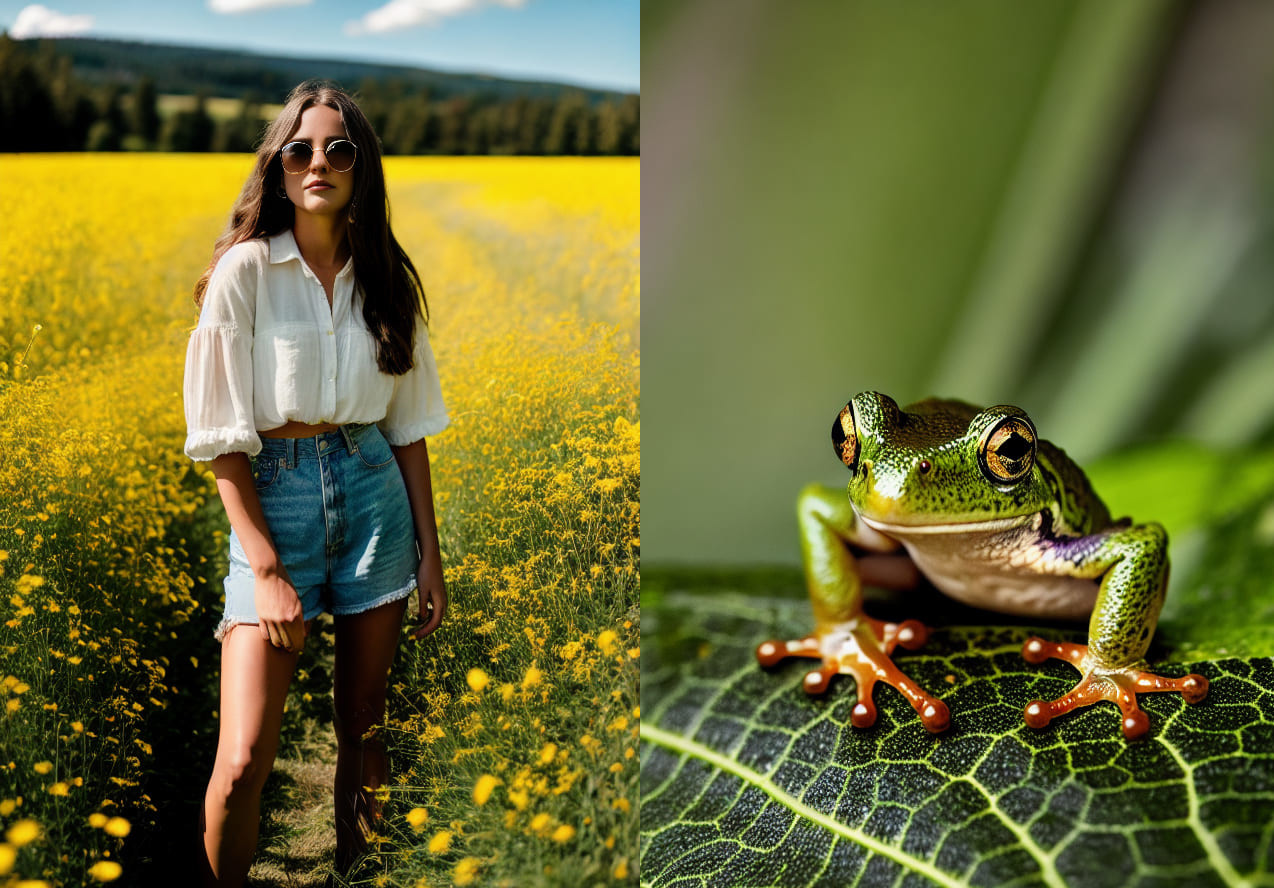

####**Model number 2:** stable-diffusion-2

This stable-diffusion-2 model is resumed from stable-diffusion-2-base (512-base-ema.ckpt) and trained for 150k steps using a v-objective on the same dataset. Resumed for another 140k steps on 768x768 images (Set to 768x768).

Developed by: Robin Rombach, Patrick Esser

Language: English

License: https://huggingface.co/stabilityai/stable-diffusion-2/blob/main/LICENSE-MODEL

####**Model number 3:** dreamlike-diffusion-1.0

This model was trained on 640x640px, 512x768px, 768x512px, etc. Higher resolution or non-square aspect ratios may produce artifacts (Set to 768x512px).

Developed by:

Language: English

License: https://huggingface.co/dreamlike-art/dreamlike-diffusion-1.0/blob/main/LICENSE.md

dreamlike-diffusion-1.0.jpg

####**Model number 4:** dreamlike-anime-1.0

This model was trained on 768x768px images, so use 768x768px, 704x832px, 832x704px, etc. Higher resolution or non-square aspect ratios may produce artifacts (Set to 832x704px). Makes an anime image

Developed by: https://twitter.com/dreamlike_art

Language: English

License: https://huggingface.co/dreamlike-art/dreamlike-anime-1.0/blob/main/LICENSE.md

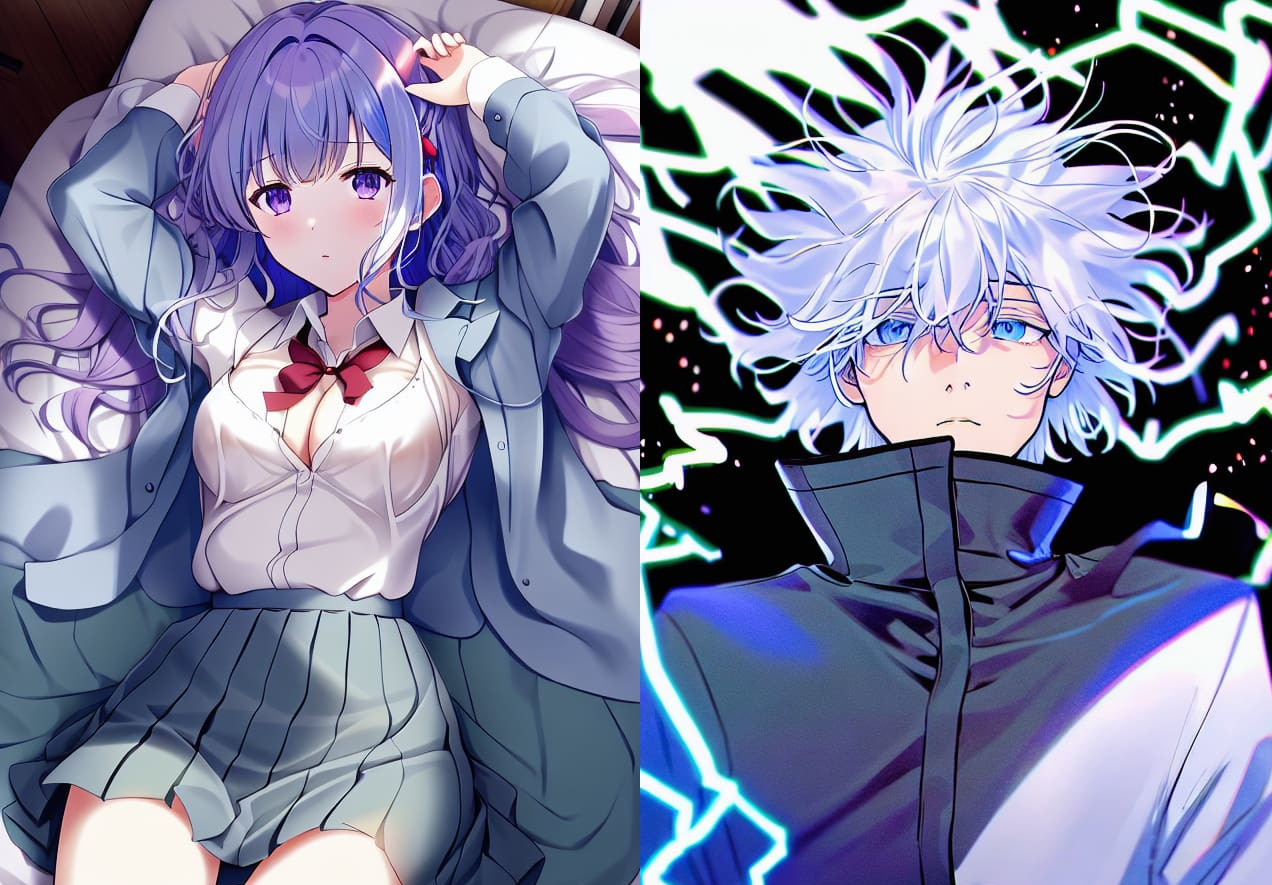

####**Model number 5:** Cyberpunk-Anime-Diffusion

An AI model that generates cyberpunk anime characters!~
Based of a finetuned Waifu Diffusion V1.3 Model with Stable Diffusion V1.5 New Vae, training in Dreambooth

Developed by: DGSpitzer

Language: English

License: https://huggingface.co/DGSpitzer/Cyberpunk-Anime-Diffusion/blob/main/LICENSE


Cyberpunk-Anime-Diffusion.jpg

## VID

####**Model number 1:** [2_576w] zeroscope

A watermark-free Modelscope-based video model optimized for producing high-quality 16:9 compositions and a smooth video output. This model was trained from the original weights using 9,923 clips and 29,769 tagged frames at 24 frames, 576x320 resolution.

Developed by: https://huggingface.co/cerspense

Language: English

![[2_576w] zeroscope.gif](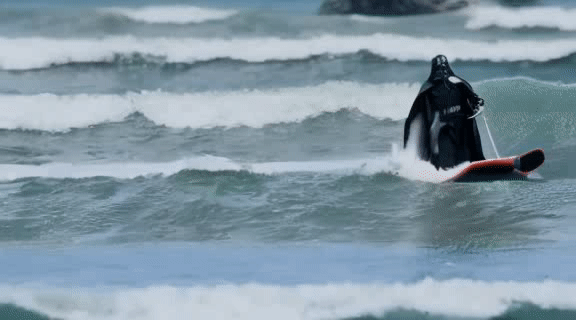)

####**Model number 2:** [1.7b] text-to-video-ms

This model is based on a multi-stage text-to-video generation diffusion model, which inputs a description text and returns a video that matches the text description. Only English input is supported.

Developed by: ModelScope

Language: English

License: https://creativecommons.org/licenses/by-nc-nd/4.0/

# Other

**My github repository:** https://github.com/DonteBoy/Ai_GEN

**Updated:** 30.6.2023